In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

filename = next(iter(uploaded))

df = pd.read_csv(filename)


Saving businessData.csv to businessData.csv


In [ ]:
print(df.tail())

    Quarter  Albany, NY  Allegany, NY  Bronx, NY  Broome, NY  Cattaraugus, NY  \
14  2022 Q1       41877          3032      63088       18628             6965   
15  2022 Q2       42861          3150      64736       18801             7009   
16  2022 Q3       46155          3496      65962       20316             7753   
17  2022 Q4       45472          3492      66445       20236             7548   
18  2023 Q1       41454          3080      63486       18685             7038   

    Cayuga, NY  Chautauqua, NY  Chemung, NY  Chenango, NY  ...  Sullivan, NY  \
14        6649           13242         7295          3415  ...          6589   
15        6728           13406         7381          3396  ...          6667   
16        7889           15045         7970          3748  ...          8311   
17        7474           14258         7702          3573  ...          7745   
18        6846           13037         7055          3445  ...          6768   

    Tioga, NY  Tompkins, NY  Uls

# CHANGE QUARTERS TO FLOATS
- .0 is Q1, .25 is Q2...

In [ ]:
import pandas as pd

# Assuming df is already loaded with your data

# Custom function to replace quarters and convert to float
def replace_quarters_and_convert_to_float(quarter_str):
    return quarter_str.replace(" Q1", ".00").replace(" Q2", ".25").replace(" Q3", ".50").replace(" Q4", ".75")

# Replace quarters and convert to float
df['Quarter'] = df['Quarter'].apply(replace_quarters_and_convert_to_float)

# Display the modified DataFrame


   Quarter  Albany, NY  Allegany, NY  Bronx, NY  Broome, NY  Cattaraugus, NY  \
0  2018.50       44720          3421      68364       20936             7592   
1  2018.75       44028          3358      69011       20502             7429   
2   2019.0       42251          3130      64062       19142             6842   
3  2019.25       42583          3232      65858       19223             6827   
4  2019.50       44903          3467      66880       20800             7637   

   Cayuga, NY  Chautauqua, NY  Chemung, NY  Chenango, NY  ...  Sullivan, NY  \
0        8410           15519         7922          3850  ...          8333   
1        8072           14672         7617          3724  ...          7571   
2        6886           13356         7068          3389  ...          6705   
3        6885           13537         7074          3420  ...          7160   
4        8085           15121         7747          3842  ...          8631   

   Tioga, NY  Tompkins, NY  Ulster, NY  Warr

In [ ]:
print(df.tail())

    Quarter  Albany, NY  Allegany, NY  Bronx, NY  Broome, NY  Cattaraugus, NY  \
14   2022.0       41877          3032      63088       18628             6965   
15  2022.25       42861          3150      64736       18801             7009   
16  2022.50       46155          3496      65962       20316             7753   
17  2022.75       45472          3492      66445       20236             7548   
18   2023.0       41454          3080      63486       18685             7038   

    Cayuga, NY  Chautauqua, NY  Chemung, NY  Chenango, NY  ...  Sullivan, NY  \
14        6649           13242         7295          3415  ...          6589   
15        6728           13406         7381          3396  ...          6667   
16        7889           15045         7970          3748  ...          8311   
17        7474           14258         7702          3573  ...          7745   
18        6846           13037         7055          3445  ...          6768   

    Tioga, NY  Tompkins, NY  Uls

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

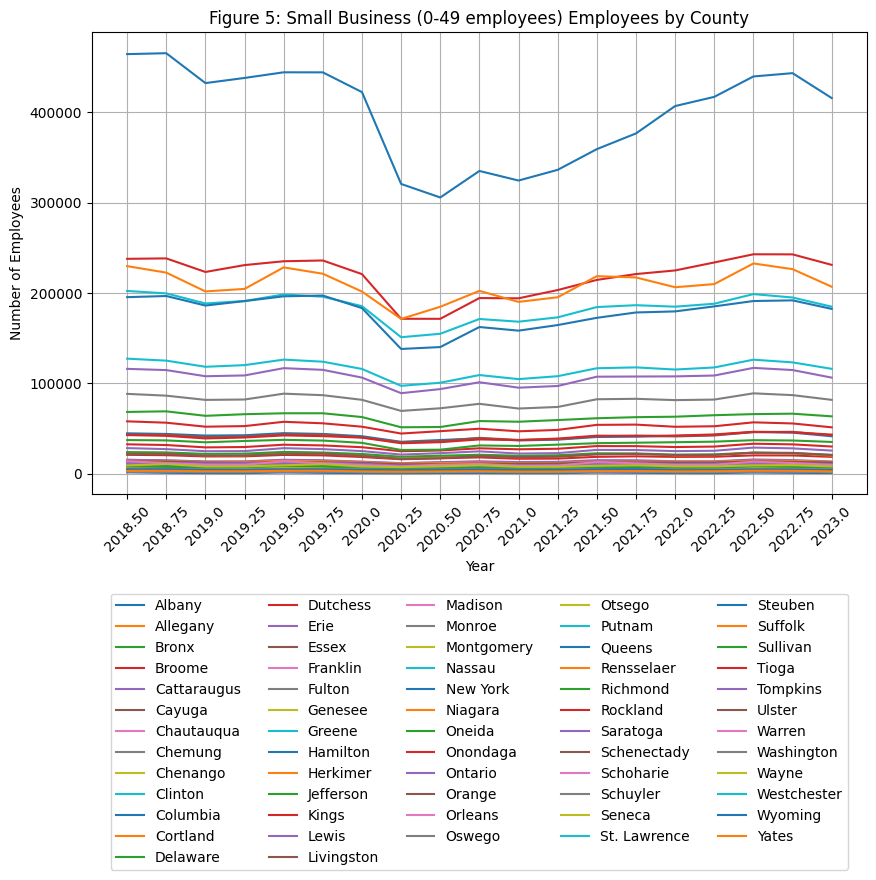

In [ ]:
# Melt the DataFrame to long format
df_melted = pd.melt(df, id_vars=['Quarter'], var_name='County', value_name='Value')

# Separate county name and state abbreviation
df_melted[['County', 'State']] = df_melted['County'].str.split(', ', expand=True)

# Pivot table to have counties as columns
df_pivoted = df_melted.pivot(index='Quarter', columns='County', values='Value')

# Plotting
plt.figure(figsize=(10, 6))
for county in df_pivoted.columns:
    plt.plot(df_pivoted.index, df_pivoted[county], label=county)

plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.title('Figure 5: Small Business (0-49 employees) Employees by County')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout

# Linear regression lines

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming df is already loaded with your data

# Create a list of future quarters from 2023.25 to 2030.0
future_quarters = [str(year) + quarter
                   for year in range(2023, 2031)
                   for quarter in ['.25', '.50', '.75', '.0']]

# Create a new DataFrame for predictions
predictions = pd.DataFrame(columns=df.columns)

# Fill the 'Quarter' column in the predictions DataFrame
predictions['Quarter'] = future_quarters

# Initialize a dictionary to hold models for each county
models = {}

# Train linear regression models for each county and make predictions for future quarters
for county in df.columns[1:]:
    X_train = df['Quarter'].values.reshape(-1, 1)
    y_train = df[county]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Save the model for future predictions
    models[county] = model

    # Make predictions for future quarters
    future_X = [[float(quarter)] for quarter in future_quarters]
    predictions[county] = model.predict(future_X)

# Display the predictions DataFrame
print(predictions)

    Quarter    Albany, NY  Allegany, NY     Bronx, NY    Broome, NY  \
0   2023.25  41315.421053   3236.192982  61279.561404  18337.070175   
1   2023.50  41290.321053   3236.091228  61145.691228  18283.971930   
2   2023.75  41265.221053   3235.989474  61011.821053  18230.873684   
3    2023.0  41340.521053   3236.294737  61413.431579  18390.168421   
4   2024.25  41215.021053   3235.785965  60744.080702  18124.677193   
5   2024.50  41189.921053   3235.684211  60610.210526  18071.578947   
6   2024.75  41164.821053   3235.582456  60476.340351  18018.480702   
7    2024.0  41240.121053   3235.887719  60877.950877  18177.775439   
8   2025.25  41114.621053   3235.378947  60208.600000  17912.284211   
9   2025.50  41089.521053   3235.277193  60074.729825  17859.185965   
10  2025.75  41064.421053   3235.175439  59940.859649  17806.087719   
11   2025.0  41139.721053   3235.480702  60342.470175  17965.382456   
12  2026.25  41014.221053   3234.971930  59673.119298  17699.891228   
13  20

In [ ]:
predictions.columns = predictions.columns.str.replace(', NY', ' County')


In [ ]:
print(predictions.head())

   Quarter  Albany County  Allegany County  Bronx County  Broome County  \
0  2023.25   41315.421053      3236.192982  61279.561404   18337.070175   
1  2023.50   41290.321053      3236.091228  61145.691228   18283.971930   
2  2023.75   41265.221053      3235.989474  61011.821053   18230.873684   
3   2023.0   41340.521053      3236.294737  61413.431579   18390.168421   
4  2024.25   41215.021053      3235.785965  60744.080702   18124.677193   

   Cattaraugus County  Cayuga County  Chautauqua County  Chemung County  \
0         7118.175439    6739.473684       13256.473684     7215.929825   
1         7123.887719    6702.463158       13217.563158     7216.312281   
2         7129.600000    6665.452632       13178.652632     7216.694737   
3         7112.463158    6776.484211       13295.384211     7215.547368   
4         7141.024561    6591.431579       13100.831579     7217.459649   

   Chenango County  ...  Sullivan County  Tioga County  Tompkins County  \
0      3538.754386  ...

<ipython-input-71-e29621474bab>:15: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



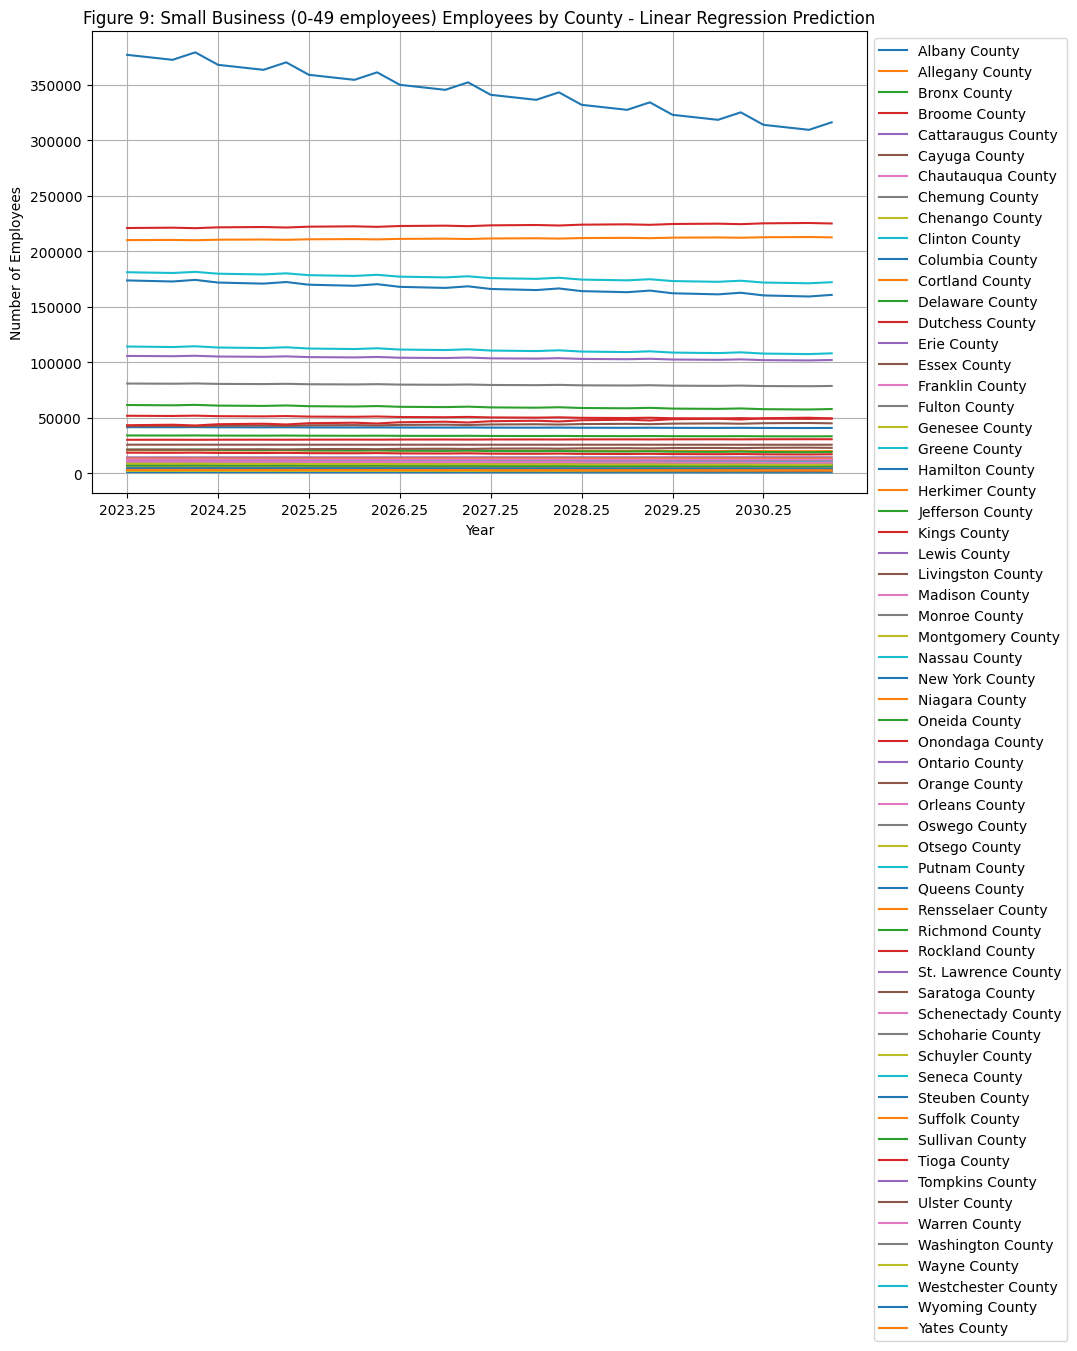

In [ ]:
import matplotlib.pyplot as plt


# Plot each county separately
plt.figure(figsize=(10, 6))
for column in predictions.columns:
    plt.plot(predictions.index, predictions[column], label=column)

plt.title('Figure 9: Small Business (0-49 employees) Employees by County - Linear Regression Prediction')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(predictions.index[::4])  # Show every 4th year
plt.tight_layout()
plt.show()


In [ ]:
# Reset the index to the default integer-based index
predictions.reset_index(drop=True, inplace=True)

# Now, you can use row numbers to access rows
# List of column names
columns_to_sum = ["Bronx County", "Kings County", "New York County",
                  "Queens County", "Suffolk County", "Nassau County",
                  "Richmond County", "Westchester County", "Rockland County"]

# Check if row 4 exists in the DataFrame
if 4 in predictions.index:
    # Calculate the sum of values in row 4 for specified columns
    sum_row_4 = predictions.loc[4, columns_to_sum].sum()

    print("Sum of values in row 4 for specified columns:", sum_row_4)
else:
    print("Row 4 does not exist in the DataFrame.")

Sum of values in row 4 for specified columns: 1402203.599999998


# chloropleth map

In [ ]:
from google.colab import files

# Prompt user to upload the GeoJSON file
uploaded = files.upload()

# Get the filename of the uploaded file
file_names = list(uploaded.keys())
file_name = file_names[0]  # Assuming only one file is uploaded

# Read the GeoJSON file
with open(file_name, 'r') as file:
    geojson_data = file.read()

Saving new-york-counties.geojson to new-york-counties.geojson


In [ ]:
pip install -U kaleido


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.3 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import json


# Assuming your DataFrame has columns like 'Albany County', 'Bronx County', etc.
# Replace with actual column names
county_names = predictions.columns[1:]  # Get all header values except the first one

# Select the row you want to use (e.g., row 0)
row_data = predictions.iloc[0]

# Create a DataFrame with county names and corresponding values
df_for_map = pd.DataFrame({'county': county_names, 'value': row_data[1:]})

# Load the GeoJSON data
with open(file_name, 'r') as file:
    geojson_data = json.load(file)


# Create a heatmap
# Create a heatmap
fig = go.Figure(go.Choroplethmapbox(
    geojson=geojson_data,
    locations=df_for_map['county'],
    z=df_for_map['value'],
    featureidkey='properties.name',  # Modify this to match the correct property in GeoJSON data
    colorscale='Plasma',
    zmin=0,
    zmax=300000,
    marker_opacity=0.7,
    marker_line_width=0,
))


# Update layout to remove mapbox controls and set the center and zoom
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=6.5,
                  mapbox_center={"lat": 42.95, "lon": -75.52},
                  margin={"r":0,"t":0,"l":0,"b":0})

# Show the heatmap
fig.show()
